In [1]:
#this is the root directory which will contain the folder to dataset of mask images in rgb

root_directory = '/Users/sahilborkar/Downloads/Project'

In [2]:
import os
import numpy as np
from PIL import Image
classes = [0, 0, 0, 0]
total = 0

def calculate_pixel_area(segmented_image):
    unique_classes = np.unique(segmented_image)
    class_areas = {}

    for cls in unique_classes:
        # Count pixels for each class
        pixels_in_class = np.sum(segmented_image == cls)
        class_areas[cls] = pixels_in_class
    return class_areas

for path, subdirs, files in os.walk(root_directory):
    #print(path)  
    dirname = path.split(os.path.sep)[-1]
    if dirname == 'masks_i':   #REPLACE THIS WITH THE FOLDER NAME WITH THE MASK DATASET
        images = os.listdir(path)  #List of all image names in this subdirectory
        for i, image_name in enumerate(images):  
            if image_name.endswith(".png"): 
                
                img= Image.open(path+"/"+image_name)
                segmented_image = np.array(img)
                class_areas = calculate_pixel_area(segmented_image)
                for cls, area in class_areas.items():
                    classes[cls] = classes[cls] + area
                    total += area

print(classes)
print(total)

[121748829, 158329092, 156033075, 54830034]
490941030


In [3]:
print("undefined: " + str((classes[0] / total)*100) + "%")
undefined_perc = (classes[0] / total)*100
print("builtup: " + str((classes[1] / total)*100) + "%")
builtup_perc = (classes[1] / total)*100
print("vegetation: " + str((classes[2] / total)*100) + "%")
vegetation_perc = (classes[2] / total)*100
print("water: " + str((classes[3] / total)*100) + "%")
water_perc = (classes[3] / total)*100

undefined: 24.799073933584243%
builtup: 32.25012421552951%
vegetation: 31.78244747643113%
water: 11.168354374455115%


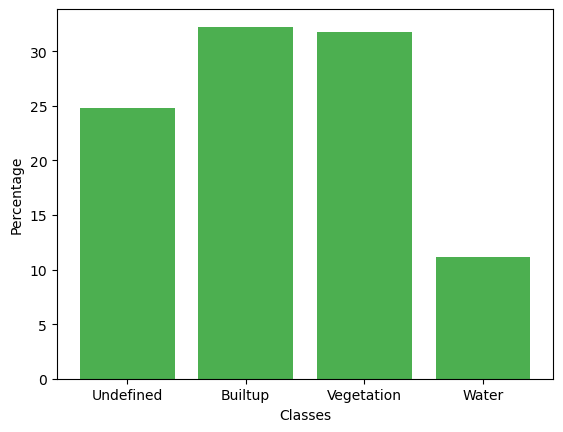

In [4]:
import matplotlib.pyplot as plt

x = np.array(["Undefined", "Builtup", "Vegetation", "Water"])
y = np.array([undefined_perc, builtup_perc, vegetation_perc, water_perc])

plt.bar(x, y, color = "#4CAF50")

plt.xlabel("Classes")
plt.ylabel("Percentage")

plt.show()